# Laboratory 4: Modelling with first order differential equations

In [1]:
%display latex

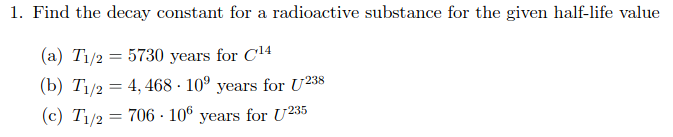

$$ x'(t) = -kx(t) $$
$$ x(0) = x_0 $$
$$ k - \text{decay constant} $$
$$ x\left(T_{\frac{1}{2}}\right) = \frac{x_0}{2} $$

In [2]:
t, k, x0 = var('t k x0')
x = function('x')(t)

In [3]:
de = desolve(diff(x,t) == -k * x, dvar=x, ivar=t, ics=[0, x0])
de

x0*e^(-k*t)

In [4]:
def x_sol(t, x0, k):
    return de.subs(t=t, x0=x0, k=k)

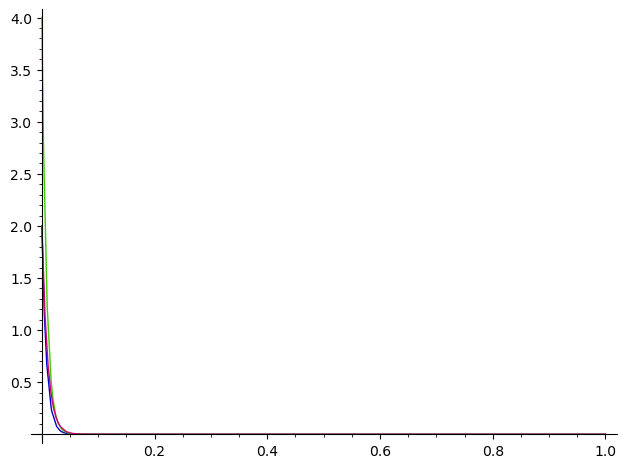

In [5]:
plot([
    lambda t: x_sol(t, 2, 1/8000),
    lambda t: x_sol(t, 4, 1/8000),
    lambda t: x_sol(t, 2, 1/10000),
], 0, 1e6)

In [6]:
T12 = var('T12')
solve(x_sol(T12, x0, k) == x0/2, T12)

[T12 == log(2)/k]

## a)

In [7]:
T12_C14 = 5730
k_C14 = ln(2) / T12_C14
print(f"decay constant = {k_C14.n()}")

decay constant = 0.000120968094338559


## b)

In [8]:
T12_U238 = 4.468 * 10 ** 9
k_U238 = ln(2) / T12_U238
print(f"decay constant = {k_U238.n()}")

decay constant = 1.55135895380471e-10


## c)

In [9]:
T12_U235 = 706 * 10 ** 6
k_U235 = ln(2) / T12_U235
print(f"decay constant = {k_U235.n()}")

decay constant = 9.81794873314370e-10


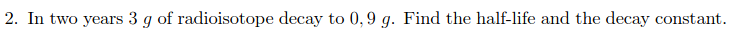

In [10]:
de

x0*e^(-k*t)

In [11]:
x_sol(t, x0, k)

x0*e^(-k*t)

$$ x\left(T\right) = x_1$$

In [12]:
T = 2
x0_ = 3
x1_ = 0.9
k_2 = solve(x_sol(T, x0_, k) == x1_, k)[1].rhs().n()
T12_2 = float(log(2) / k_2) # from earlier equation

print(f"decay constant = {k_2}")
print(f"half-life = {T12_2}")

decay constant = 0.601986402162968
half-life = 1.1514332849868898


In [13]:
T = 2
x0_ = 3
x1_ = 0.9
k_2 = solve(x_sol(T, x0_, k) == x1_, k)[1].rhs().n()
T12_2 = float(log(2) / k_2) # from earlier equation

print(f"decay constant = {k_2}")
print(f"half-life = {T12_2}")

decay constant = 0.601986402162968
half-life = 1.1514332849868898


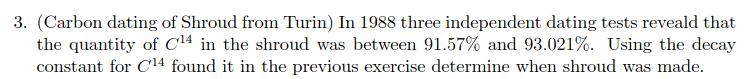

$$ 
\begin{align*}
x(t) &= x_0e^{-kt} \\
\frac{x(t)}{x_0} &= e^{-kt} \\
p &= e^{-kt} \quad \text{where p is the decimal percentage} \\
\ln(p) &= -kt \\
t &= -\frac{\ln(p)}{k}
\end{align*}
$$

In [14]:
t1 = -log(0.9157) / k_C14
t2 = -log(0.93021) / k_C14
print(f"Shroud was made between {1988 - ceil(t1.n())} and {1988 - floor(t2.n())}")

Shroud was made between 1259 and 1390


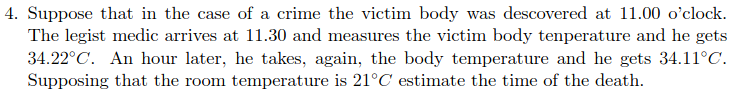

In [15]:
t, T0, T_out, k = var('t T0 T_out k')
T = function('T')(t)


In [16]:
N_de = desolve(diff(T, t) == -k * (T - T_out), dvar=T, ivar=t, ics=[0, T0])
N_de

(T_out*e^(k*t) + T0 - T_out)*e^(-k*t)

In [17]:
def T_sol(t, k, T0, T_out):
    return N_de.subs(t=t, k=k, T0=T0, T_out=T_out)

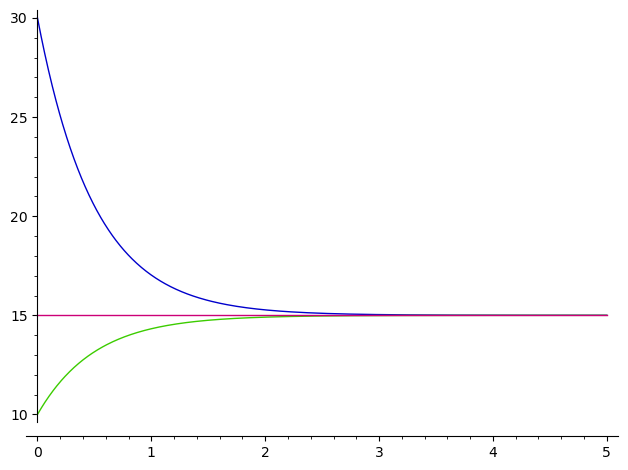

In [18]:
plot([
    lambda t: T_sol(t, 2, 30, 15),
    lambda t: T_sol(t, 2, 10, 15),
    lambda t: T_sol(t, 2, 15, 15)
], 0, 5)

In [19]:
T_sol(t, k, T0, T_out)

(T_out*e^(k*t) + T0 - T_out)*e^(-k*t)

In [20]:
T1 = 34.22
T2 = 34.11
T_out_ = 21
T0_ = 37
k_ = -log((T2 - T_out_)/(T1 - T_out_))/(t2 - t1)
eq = T_sol(t, k_, T0_, T_out_) == T1
solve(eq, t)[0].rhs().n()
# idk:D

-2968.66202146766

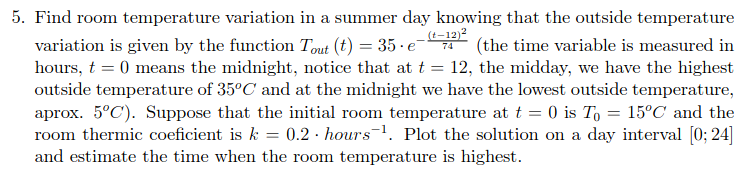

In [21]:
T_sol(t, k, T0, T_out)

(T_out*e^(k*t) + T0 - T_out)*e^(-k*t)

In [52]:
T0_ = 15
k = 0.2

In [84]:
de = desolve(diff(T, t) + k*T == k*(35*exp(-(t-12)^2/74)), dvar=T, ivar=t, ics=[0, T0_])
de

1/2*(7*sqrt(pi)*(sqrt(74)*erf(1/74*sqrt(74)*t - 97/370*sqrt(74))*e^3 + sqrt(74)*erf(97/370*sqrt(74))*e^3)*e^(7/50) + 30)*e^(-1/5*t)

In [54]:
def T_sol(t):
    return de.subs(t=t)

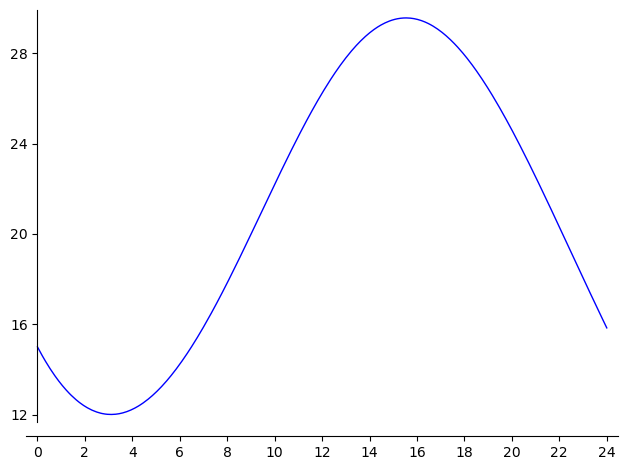

In [75]:
plot(lambda t: T_sol(t), 0, 24, ticks=[list(range(0, 25, 2)), list(range(0, 29, 4))])

In [83]:
print(f"highset seems to be at 4pm: {T_sol(16).n():.3f}'C")

highset seems to be at 4pm: 29.498'C
